In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
from matplotlib.widgets import Button, Slider
from matplotlib.widgets import Slider
from super_cub import *

In [2]:
default_params = AircraftParams(
    bw=2.28,
    cw=0.25,
    a2dw=0.1,
    alpha_0w=-4,
    ew=0.9,
    cd0w=0.007,
    rw=0.002,
    Cmw=-0.1,
    bt=0.5,
    ct=0.1,
    cef=0.4*0.1,
    lt=2.5,
    tt=0.00635,
    ih=0.,
    et=0.99,
    a2dt=0.1,
    alpha_0t=-4,
    epsilon0=0,
    tau_e=0.7,
    cd0t=0.007,
    rt=0.002,
    df=0.2,
    lf=2,
    htv=0.2,
    ltv=0.8
)



In [3]:
airplane = super_cub(default_params)

In [4]:
def generate_data(params=default_params):
    alphas = np.linspace(-6.27, 15, 100)
    del_e = np.linspace(-10, 10, 5)
    Re_c = 500000
    airplane = super_cub(params)
    h = 0.4
    Cms = np.zeros((len(del_e), len(alphas)))
    Cls = np.zeros((len(del_e), len(alphas)))
    Cds = np.zeros((len(del_e), len(alphas)))

    for i in range(len(del_e)):
        for j in range(len(alphas)):
            Cms[i,j] = airplane.get_coefficients(alphas[j], del_e[i], Re_c, h)[0]
            Cls[i,j] = airplane.get_coefficients(alphas[j], del_e[i], Re_c, h)[1]
            Cds[i,j] = airplane.get_coefficients(alphas[j], del_e[i], Re_c, h)[2]
        


    # Define the del_e values
    del_e_values = np.linspace(-10, 10, 5)
    alpha_trim = np.linspace(-18,18, 100)
    trim_cl = []
    trim_cd = []

    for alpha in alpha_trim:
        f_CM = lambda x: airplane.get_coefficients(5, x, Re_c, h)[0]
        del_e = fsolve(f_CM, 0)[0]
        trim_cl.append(airplane.get_coefficients(alpha, del_e, Re_c, h)[1])
        trim_cd.append(airplane.get_coefficients(alpha, del_e, Re_c, h)[2])

    from scipy.optimize import curve_fit

    def parabolic_function(x, cd0, K):
        return cd0 + K*x**2

    popt, _ = curve_fit(parabolic_function, trim_cl, trim_cd)
    coefficients = np.polyfit(trim_cl, trim_cd, 2)

    # Extract the coefficients
    cd0 = popt[0]
    K = popt[1]

 

    return Cls, Cds, Cms, trim_cd, trim_cl, cd0, K

In [5]:
Cls, Cds, Cms, trim_cd, trim_cl, cd0, K = generate_data()

IndexError: index 3 is out of bounds for axis 0 with size 3

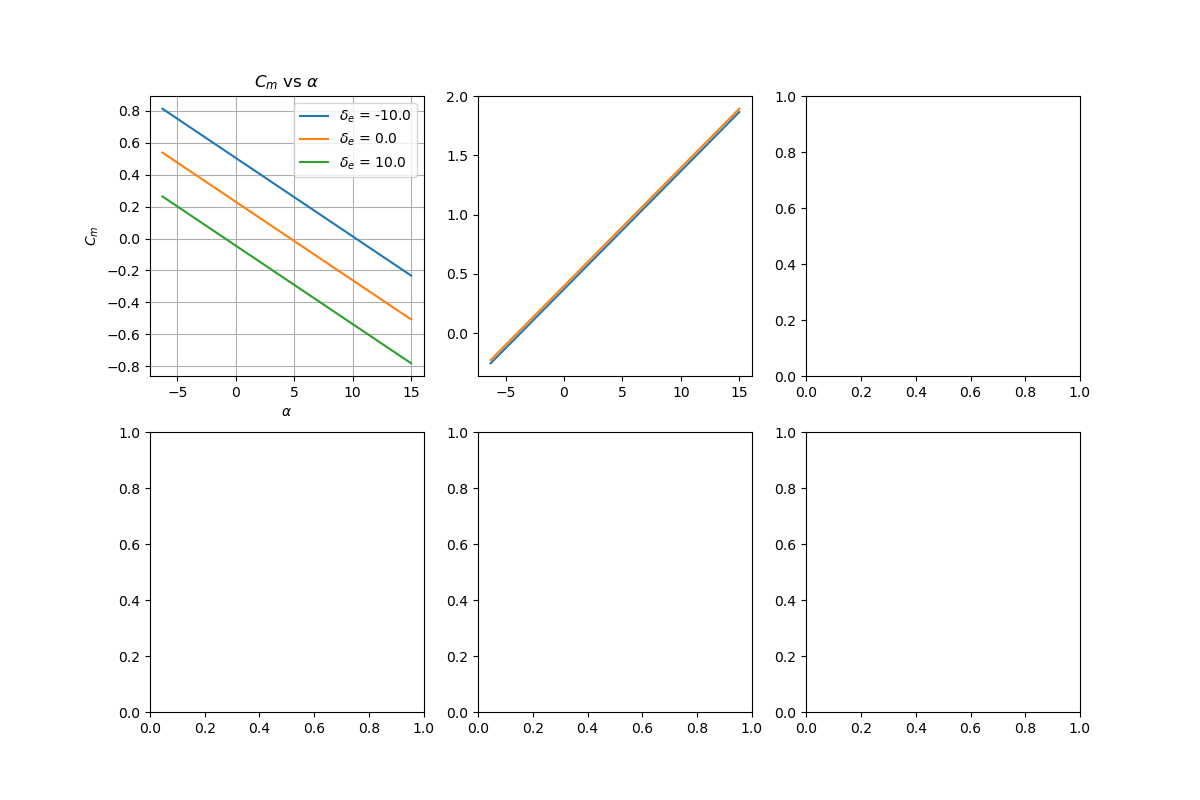

In [6]:
%matplotlib widget
"""
Sliders for design hyperparameters:
    - b_w: wing span
    - c_w: wing chord
    - b_t: tail span
    - c_t: tail chord
    - c_ef: elevator chord factor (c_e/c_t)
    -i_h: horizontal tail incidence angle
    -d_f: fuselage diameter
    -l_f: fuselage length
    -h_tv: vertical tail height
    -l_tv: vertical tail length
"""
Sliders_names =       ['b_w',      'c_w',      'b_t',      'c_t',     'c_ef',  'i_h',      'd_f',     'l_f',      'l_tv',  'h_tv']
Slider_lims =   [(0.1, 2.28), (0.05, 1), (0.01, 2), (0.01, 1), (0.1, 1), (-10, 10), (0.01, 1), (0.01, 4), (0.01, 2), (0.01, 2)]
Slider_inits = [airplane.bw, airplane.cw, airplane.bt, airplane.ct, airplane.ce/airplane.ct, airplane.ih, airplane.df, airplane.lf, airplane.htv, airplane.ltv]
# Create the figure and axes
alphas = np.linspace(-6.27, 15, 100)
del_e_values = np.linspace(-10, 10, 3)
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plot Cm vs alphas for each del_e value
cm0_line, = axs[0,0].plot(alphas, Cms[0], label=f"$\delta_e$ = {del_e_values[0]}")
cm1_line, = axs[0,0].plot(alphas, Cms[1], label=f"$\delta_e$ = {del_e_values[1]}")
cm2_line, = axs[0,0].plot(alphas, Cms[2], label=f"$\delta_e$ = {del_e_values[2]}")
    
# Set the plot title and labels
axs[0,0].set_title("$C_m$ vs $\\alpha$")
axs[0,0].set_xlabel("$\\alpha$")
axs[0,0].set_ylabel("$C_m$")

# Add a legend
axs[0,0].legend()
axs[0,0].grid(True)

# Plot Cl vs alphas for each del_e value
cl0_line, = axs[0,1].plot(alphas, Cls[1], label=f"$\delta_e$ = {del_e_values[1]}")
cl1_line, = axs[0,1].plot(alphas, Cls[2], label=f"$\delta_e$ = {del_e_values[2]}")
cl2_line, = axs[0,1].plot(alphas, Cls[3], label=f"$\delta_e$ = {del_e_values[3]}")


# Set the plot title and labels
axs[0,1].set_title("$C_l$ vs $\\alpha$")
axs[0,1].set_xlabel("$\\alpha$")
axs[0,1].set_ylabel("$C_l$")

# Add a legend
axs[0,1].legend()
axs[0,1].grid(True)

# Plot Cl vs Cd for each del_e value
cd0_line, = axs[1,0].plot(Cds[1], Cls[1], label=f"$\delta_e$ = {del_e_values[1]}")
cd1_line, = axs[1,0].plot(Cds[2], Cls[2], label=f"$\delta_e$ = {del_e_values[2]}")
cd2_line, = axs[1,0].plot(Cds[3], Cls[3], label=f"$\delta_e$ = {del_e_values[3]}")
    
# Set the plot title and labels
axs[1,0].set_title("$C_l$ vs $C_d$")
axs[1,0].set_xlabel("$C_d$")
axs[1,0].set_ylabel("$C_l$")

# Add a legend
axs[1,0].legend()
axs[1,0].grid(True)

trim_line, = axs[1,1].plot(trim_cd, trim_cl, label='Data')
fit_line, = axs[1,1].plot(cd0+K*np.array(trim_cl)**2, trim_cl, label='Fitted Curve')

# Annotate the fit equations
# equation = f"$C_d = {cd0:.5f} + {K:.5f}C_l^2$"
# axs[1,1].annotate(equation, xy=(0.5, 0.5), xycoords='axes fraction', fontsize=12)

# Set the plot title and labels
axs[1,1].set_title("Trimmed Drag Polar with Fitted Curve")
axs[1,1].set_xlabel("$C_d$")
axs[1,1].set_ylabel("$C_l$")
axs[0, 2].axis('off')
axs[1, 2].axis('off')
# Adjust the spacing between subplots
# plt.tight_layout()


bw_ax = fig.add_axes([0.7, 0.7, 0.8, 0.03])
bw_slider = Slider(bw_ax, 'bw', 0.1, 2.28, valinit=airplane.bw)
cw_ax = fig.add_axes([0.7, 0.66, 0.8, 0.03])
cw_slider = Slider(cw_ax, 'cw', 0.05, 1, valinit=airplane.cw)
bt_ax = fig.add_axes([0.7, 0.62, 0.8, 0.03])
bt_slider = Slider(bt_ax, 'bt', 0.01, 2, valinit=airplane.bt)
ct_ax = fig.add_axes([0.7, 0.58, 0.8, 0.03])
ct_slider = Slider(ct_ax, 'ct', 0.01, 1, valinit=airplane.ct)
cef_ax = fig.add_axes([0.7, 0.54, 0.8, 0.03])
cef_slider = Slider(cef_ax, 'cef', 0.1, 1, valinit=airplane.ce/airplane.ct)
ih_ax = fig.add_axes([0.7, 0.5, 0.8, 0.03])
ih_slider = Slider(ih_ax, 'ih', -10, 10, valinit=airplane.ih)
df_ax = fig.add_axes([0.7, 0.46, 0.8, 0.03])
df_slider = Slider(df_ax, 'df', 0.01, 1, valinit=airplane.df)
lf_ax = fig.add_axes([0.7, 0.42, 0.8, 0.03])
lf_slider = Slider(lf_ax, 'lf', 0.01, 4, valinit=airplane.lf)
ltv_ax = fig.add_axes([0.7, 0.38, 0.8, 0.03])
ltv_slider = Slider(ltv_ax, 'ltv', 0.01, 2, valinit=airplane.ltv)
htv_ax = fig.add_axes([0.7, 0.34, 0.8, 0.03])
htv_slider = Slider(htv_ax, 'htv', 0.01, 2, valinit=airplane.htv)


def update(val):
    params = default_params
    params.bw = bw_slider.val
    params.cw = cw_slider.val
    params.bt = bt_slider.val
    params.ct = ct_slider.val
    params.cef = cef_slider.val
    params.ih = ih_slider.val
    params.df = df_slider.val
    params.lf = lf_slider.val
    params.ltv = ltv_slider.val
    params.htv = htv_slider.val

    Cls, Cds, Cms, trim_cd, trim_cl, cd0, K = generate_data(params)
    cl0_line.set_ydata(Cls[0])
    cl1_line.set_ydata(Cls[1])
    cl2_line.set_ydata(Cls[2])

    cm0_line.set_ydata(Cms[0])
    cm1_line.set_ydata(Cms[1])
    cm2_line.set_ydata(Cms[2])

    cd0_line.set_xdata(Cds[0])
    cd1_line.set_xdata(Cds[1])
    cd2_line.set_xdata(Cds[2])
    
    trim_line.set_xdata(trim_cd)
    trim_line.set_ydata(trim_cl)
    fit_line.set_xdata(cd0+K*np.array(trim_cl)**2)
    fit_line.set_ydata(trim_cl)
    
    fig.canvas.draw_idle()

bw_slider.on_changed(update)
cw_slider.on_changed(update)
bt_slider.on_changed(update)
ct_slider.on_changed(update)
cef_slider.on_changed(update)
ih_slider.on_changed(update)
df_slider.on_changed(update)
lf_slider.on_changed(update)
ltv_slider.on_changed(update)
htv_slider.on_changed(update)




# Adjust the spacing between subplots
# plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
cw_slider is None
    